<a href="https://colab.research.google.com/github/cosmyyyyyyyy12/olympic-athletes-data-cleaning-pandas/blob/main/olympic_athletes_data_cleaning_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🏅 Real-World Dataset Cleaning with Python Pandas

(Olympic Athletes Dataset)

    This notebook focuses on cleaning and exploring a real-world
    Olympic athletes dataset using Python Pandas. The objective is to
    understand how raw data looks in practice and apply essential data cleaning
    techniques such as handling missing values, renaming columns, filtering relevant records, and
    preparing the dataset for analysis.

    The project emphasizes learning-by-doing, with step-by-step operations
    to make the data consistent, readable, and
    analysis-ready. It serves as a practical introduction to
    data cleaning workflows commonly used in data analysis
    and data science projects.

    Key skills practiced:
    - Loading CSV data using Pandas
    - Inspecting dataset structure and missing values
    - Cleaning and standardizing columns
    - Filtering and selecting relevant data
    - Saving a cleaned dataset for future use

    This notebook is part of my journey
    to strengthen my data analysis fundamentals using real
    datasets.

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [118]:
df = pd.read_csv("https://raw.githubusercontent.com/KeithGalli/complete-pandas-tutorial/refs/heads/master/data/bios.csv")

In [119]:
bios = df.copy()

In [120]:
bios.columns = bios.columns.str.strip().str.lower()

In [121]:
bios['height_cm'] = bios['height_cm'].fillna(bios['height_cm'].mean())
bios['weight_kg'] = bios['weight_kg'].fillna(bios['weight_kg'].mean())

In [122]:
bios['born_date'] = pd.to_datetime(bios['born_date'])
bios['died_date'] = pd.to_datetime(bios['died_date'])

In [123]:
bios['age'] = bios['died_date'].dt.year - bios['born_date'].dt.year
today = pd.Timestamp.today().date()
bios['age'] = bios['age'].fillna(today.year - bios['born_date'].dt.year)
num = bios['born_country'].value_counts()

In [124]:
ages = bios.sort_values('age' , ascending=True).head(10)[['name','born_country','age']]

In [125]:
athletes_per_country = bios['born_country'].value_counts()

In [126]:
bios.to_csv("cleaned_olympic_athletes.csv", index=False)

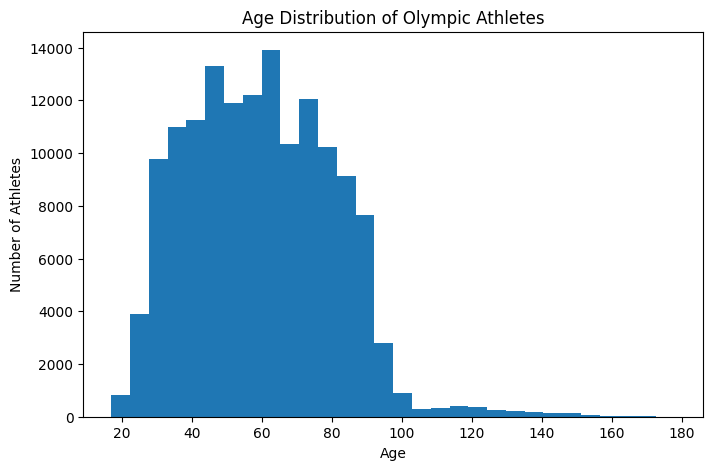

In [127]:
plt.figure(figsize=(8,5))
plt.hist(bios['age'], bins=30)
plt.title("Age Distribution of Olympic Athletes")
plt.xlabel("Age")
plt.ylabel("Number of Athletes")
plt.show()

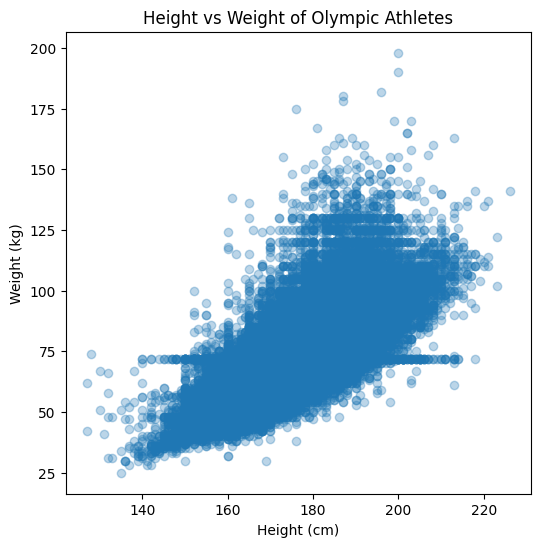

In [128]:
plt.figure(figsize=(6,6))
plt.scatter(
    bios['height_cm'],
    bios['weight_kg'],
    alpha=0.3
)
plt.title("Height vs Weight of Olympic Athletes")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()


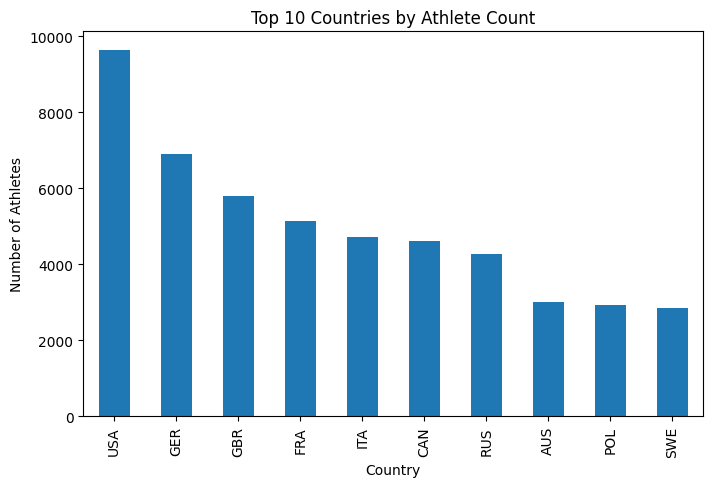

In [129]:
top_countries = bios['born_country'].value_counts().head(10)

plt.figure(figsize=(8,5))
top_countries.plot(kind='bar')
plt.title("Top 10 Countries by Athlete Count")
plt.xlabel("Country")
plt.ylabel("Number of Athletes")
plt.show()
